# Decision Tree
## Introduction
Decision trees start at a root node and split the data based on feature values. Each internal node represents a feature test, each branch represents the outcome of the test, and each leaf node represents a class label or decision.
<img src="DecisionTree.jpg" alt="alt text" width="350"/>

## Data Processing
The Titanic dataset is loaded and preprocessed for the decision tree model. This includes handling missing values and encoding categorical features.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

# Load the dataset
titanic_data = sns.load_dataset('titanic')
titanic_data = titanic_data.dropna()

# Encode categorical features
labelencoder = LabelEncoder()
titanic_data['sex'] = labelencoder.fit_transform(titanic_data['sex'])
titanic_data['embarked'] = labelencoder.fit_transform(titanic_data['embarked'])

# Select features and target variable
X = titanic_data[['pclass', 'sex', 'age', 'fare', 'embarked']]
y = titanic_data['survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Decision Tree Algorithm Implementation
Then I implemented the Decision Tree algorithm using the scikit-learn library.

In [3]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=10,random_state=42)

# Train the model
clf.fit(X_train, y_train)
    

DecisionTreeClassifier(max_depth=10, random_state=42)

## Model Training and Evaluation
I focused on evaluating the performance of the decision tree model I had previously trained using the Titanic dataset.I made predictions on the test set with the predict function. Following that, I calculated the accuracy of the model to determine how often it correctly predicted the outcomes. Lastly, I generated a classification report that provided detailed metrics such as precision, recall, and f1-score for each class.

In [4]:
# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7297297297297297

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.46      0.55        13
           1       0.75      0.88      0.81        24

    accuracy                           0.73        37
   macro avg       0.71      0.67      0.68        37
weighted avg       0.72      0.73      0.72        37



## Results Visualization
I displayed the structure of my decision tree model using the Titanic dataset and plotted the ROC curve to showcase the model's classification performance. These visualizations help in understanding the decision-making process and evaluating the model's predictive power.

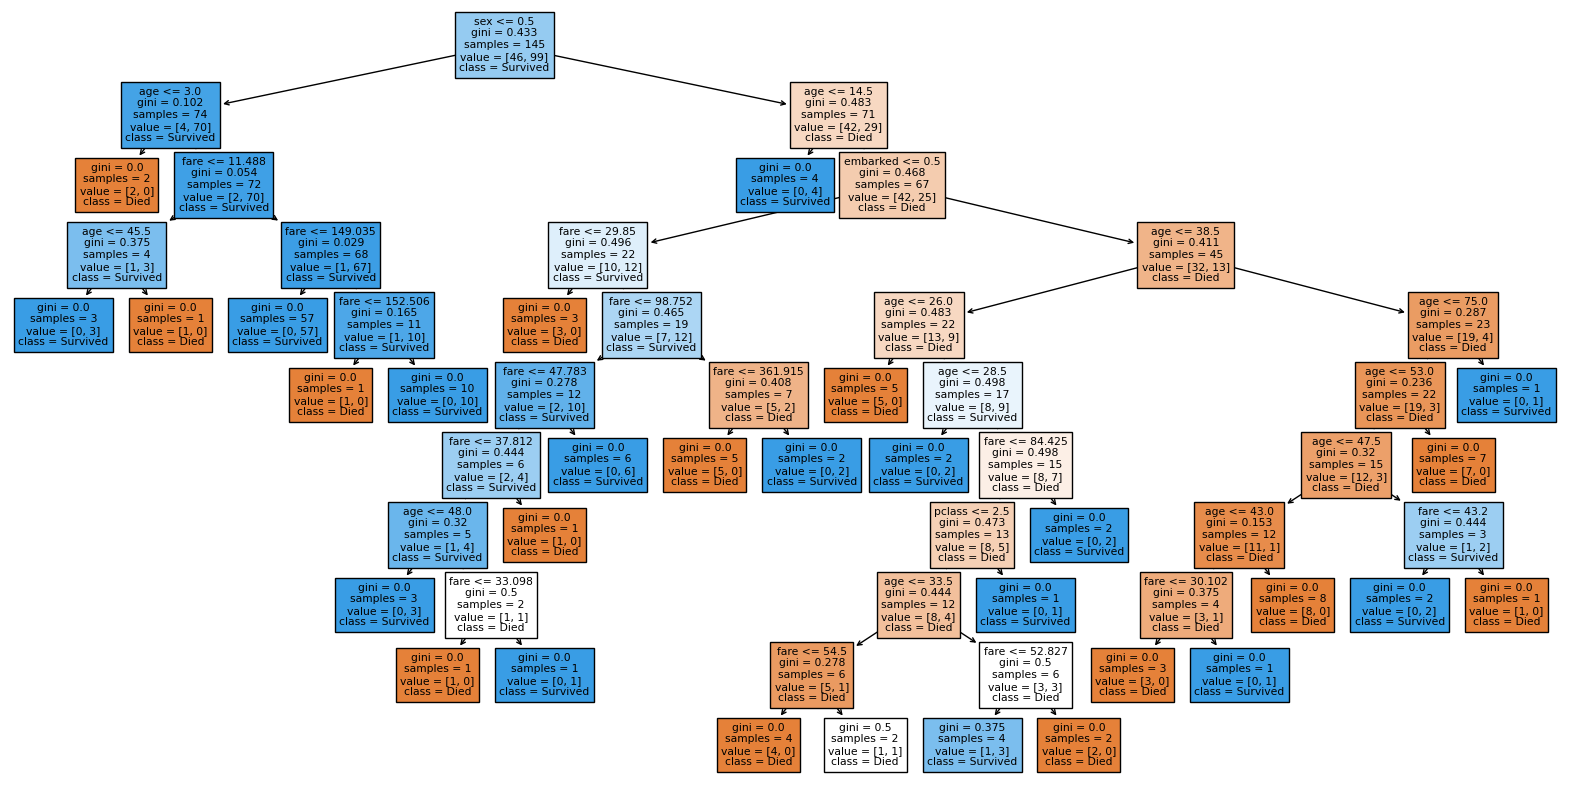

In [5]:
from sklearn import tree
import matplotlib.pyplot as plt

# Visualize the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, feature_names=X.columns.tolist(), class_names=['Died', 'Survived'])
plt.show()

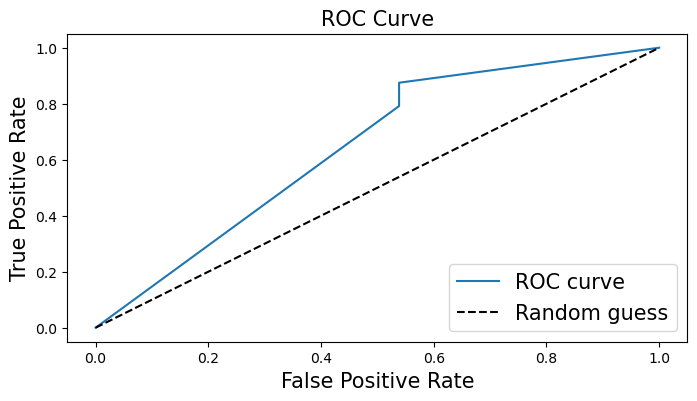

In [11]:
from sklearn import metrics
import matplotlib.pyplot as plt

# Assuming decision_tree is your trained model and X_test, y_test are your test sets.
test_pred_prob = clf.predict_proba(X_test)[:, 1]

# Plot ROC curve
fig, ax = plt.subplots(figsize=(8, 4))

fpr, tpr, thresholds = metrics.roc_curve(y_test, test_pred_prob)
ax.plot(fpr, tpr, label="ROC curve")
ax.plot([0, 1], [0, 1], 'k--', label="Random guess")
ax.set_xlabel("False Positive Rate", fontsize=15)
ax.set_ylabel("True Positive Rate", fontsize=15)
ax.set_title("ROC Curve", fontsize=15)
ax.legend(loc="lower right", fontsize=15)

plt.show()

## Conclusion
In this analysis, I utilized the Titanic dataset to train and evaluate a decision tree classifier. My model achieved an accuracy of approximately 73%, indicating a reasonable level of predictive power. I visualized the decision tree to interpret how different features affect predictions and plotted an ROC curve, demonstrating the model's ability to distinguish between the classes effectively. Overall, the visualizations and metrics indicate that the decision tree model has performed competently on the given dataset.